In [72]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
import seaborn as sns

In [73]:
#importing datasets  
data_set= pd.read_csv('suv_data.csv')  

In [74]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [75]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [76]:
data_set.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


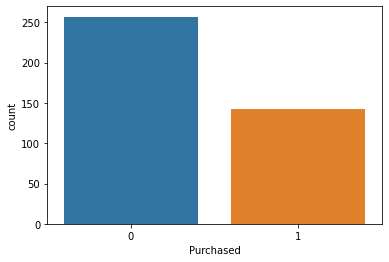

In [77]:
sns.countplot(x='Purchased', data = data_set)

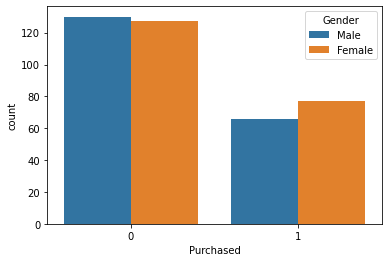

In [78]:
sns.countplot(x='Purchased', hue = 'Gender', data = data_set)

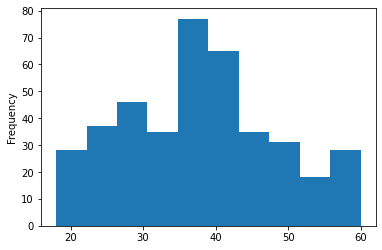

In [79]:
data_set['Age'].plot.hist()

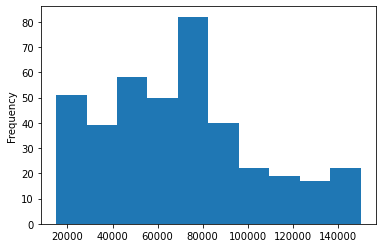

In [80]:
data_set['EstimatedSalary'].plot.hist()

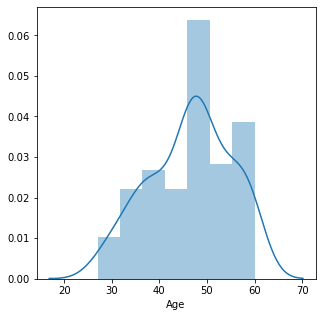

In [81]:
mtp.figure(figsize = (5,5))
sns.distplot(data_set[data_set['Purchased']==1]['Age'])

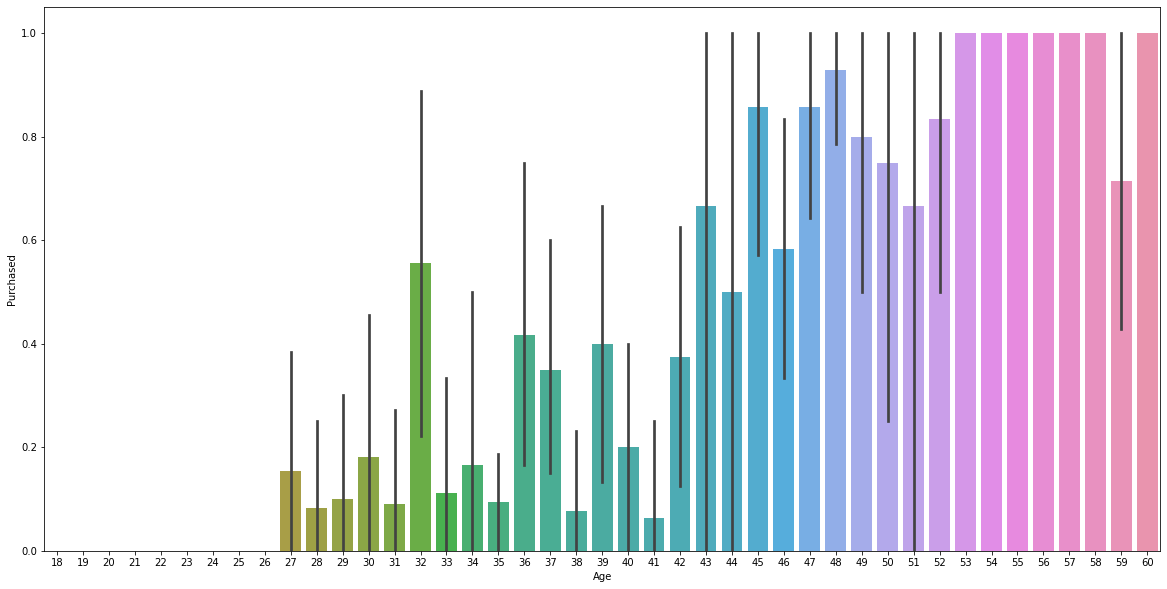

In [82]:
mtp.figure(figsize = (20,10))
sns.barplot(x=data_set['Age'],y=data_set['Purchased'])

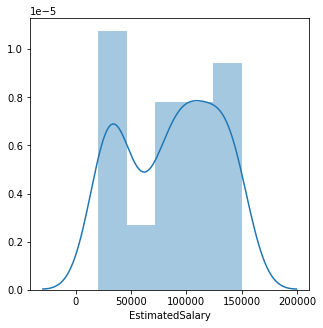

In [83]:
mtp.figure(figsize = (5,5))
sns.distplot(data_set[data_set['Purchased']==1]['EstimatedSalary'])

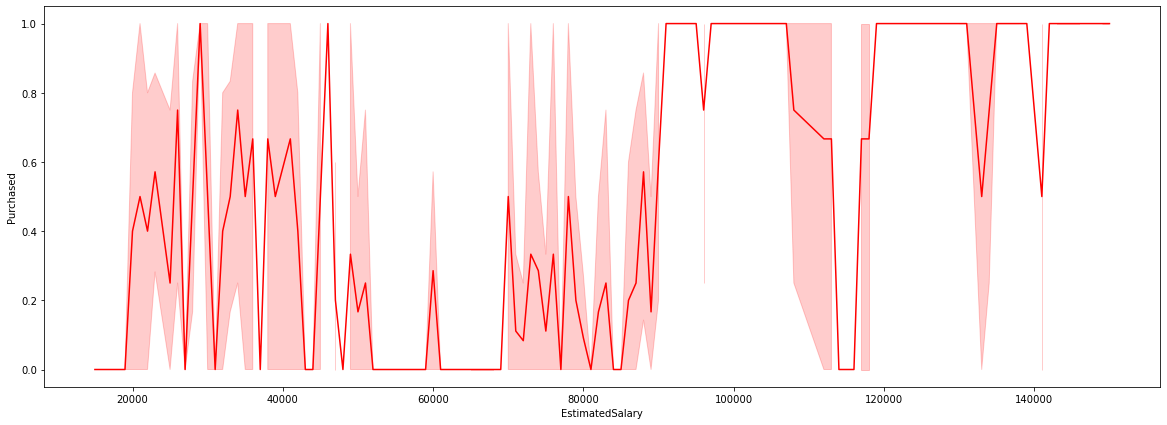

In [84]:
mtp.figure(figsize = (20,7))
sns.lineplot(x=data_set['EstimatedSalary'],y=data_set['Purchased'],color="red")

In [85]:
Gender = pd.get_dummies(data_set['Gender'], drop_first = True)
Gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [86]:
data = pd.concat([data_set, Gender], axis = 1)

In [87]:
data.drop(['User ID', 'Gender'], axis = 1, inplace = True)
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [104]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [105]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [106]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [107]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [108]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred) 
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [111]:
print("Accuracy: ",accuracy_score(y_test,y_pred))


Accuracy:  0.89
